In [1]:
from tqdm.auto import tqdm

import os
import requests
import zipfile
import cv2
import math
import matplotlib.pyplot as plt
import glob
import numpy as np
import random
import seaborn as sns
import pandas as pd 

from PIL import Image

C:\Users\avina\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
pip install ultralytics

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\avina\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
from ultralytics import YOLO
model = YOLO("yolo11m.pt")

In [ ]:
# to generate csv file
results = model.train(
   data=r'C:\Users\avina\OneDrive\Desktop\AI-powered Medical Diognisis System\brain tumer\datasets\archive\BrainTumor\BrainTumorYolov11/data.yaml',
   imgsz=128,
   epochs=10,
   batch=16,
   name='yolov11_m'
)

New https://pypi.org/project/ultralytics/8.3.81 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.79  Python-3.12.9 torch-2.6.0+cpu CPU (12th Gen Intel Core(TM) i5-12500H)
engine\trainer: task=detect, mode=train, model=yolo11m.pt, data=C:\Users\avina\OneDrive\Desktop\AI-powered Medical Diognisis System\brain tumer\datasets\archive\BrainTumor\BrainTumorYolov11/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov11_m, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, vi

train: Scanning C:\Users\avina\OneDrive\Desktop\AI-powered Medical Diognisis System\brain tumer\datasets\archive\BrainTumor\BrainTumorYolov11\train\labels.cache... 2144 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2144/2144 [00:00<?, ?it/s]

WARNING  Box and segment counts should be equal, but got len(segments) = 2143, len(boxes) = 2144. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



val: Scanning C:\Users\avina\OneDrive\Desktop\AI-powered Medical Diognisis System\brain tumer\datasets\archive\BrainTumor\BrainTumorYolov11\valid\labels.cache... 612 images, 0 backgrounds, 0 corrupt: 100%|██████████| 612/612 [00:00<?, ?it/s]

Plotting labels to runs\detect\yolov11_m\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 128 train, 128 val
Using 0 dataloader workers
Logging results to runs\detect\yolov11_m
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.817       3.39      1.382         13        128:  21%|██        | 28/134 [00:58<03:40,  2.08s/it]

| Class       | Images | Instances | Box(P) | R    | mAP50 | mAP50-95 |
|-------------|--------|-----------|--------|------|-------|----------|
| All         | 612    | 612       | 0.902  | 0.854| 0.908 | 0.653    |
| Glioma      | 285    | 285       | 0.853  | 0.732| 0.825 | 0.493    |
| Meningioma  | 142    | 142       | 0.931  | 0.93 | 0.966 | 0.8      |
| Pituitary   | 185    | 185       | 0.923  | 0.901| 0.932 | 0.668    |


<Figure size 1000x600 with 0 Axes>

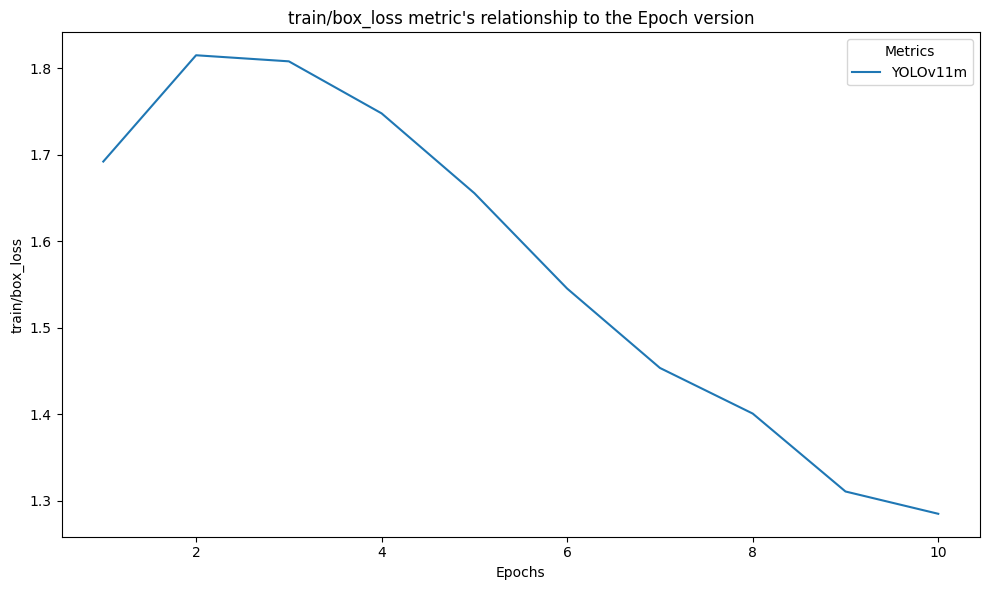

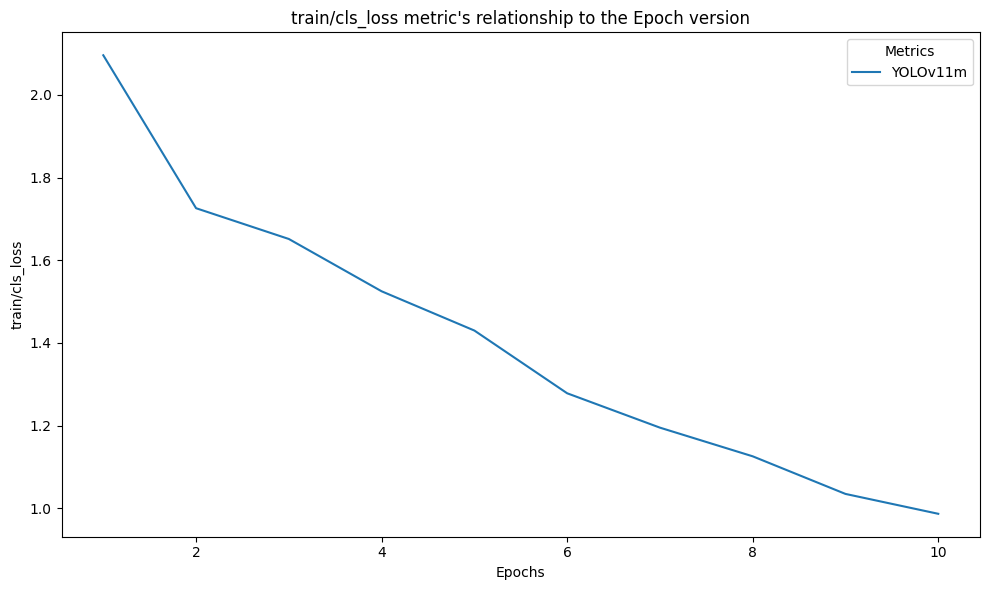

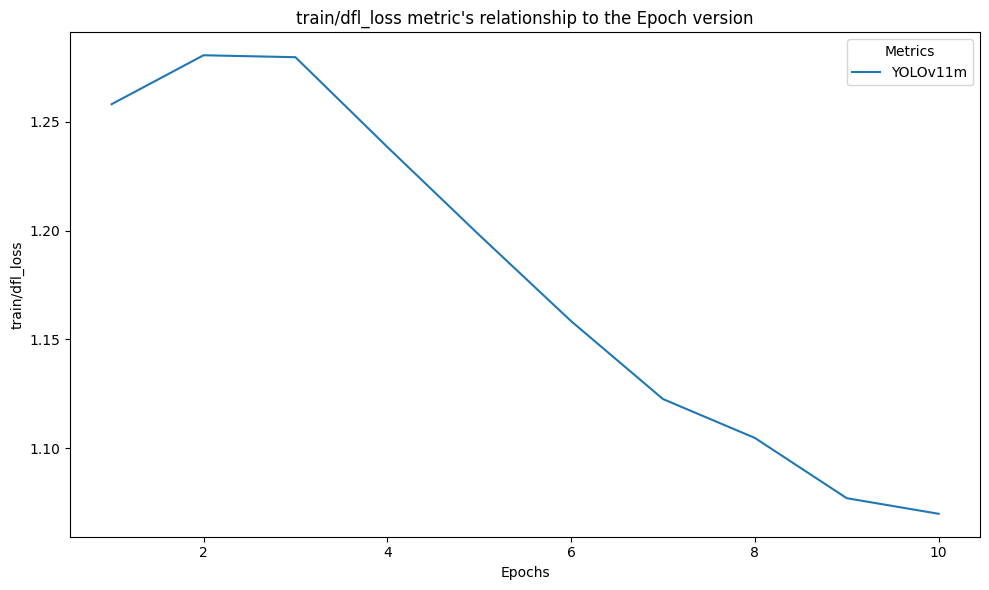

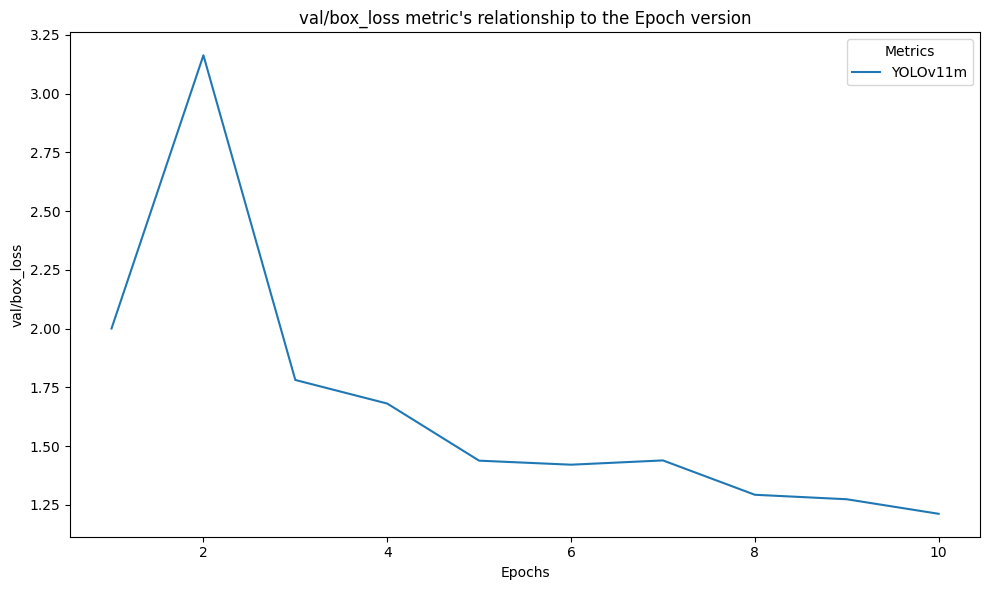

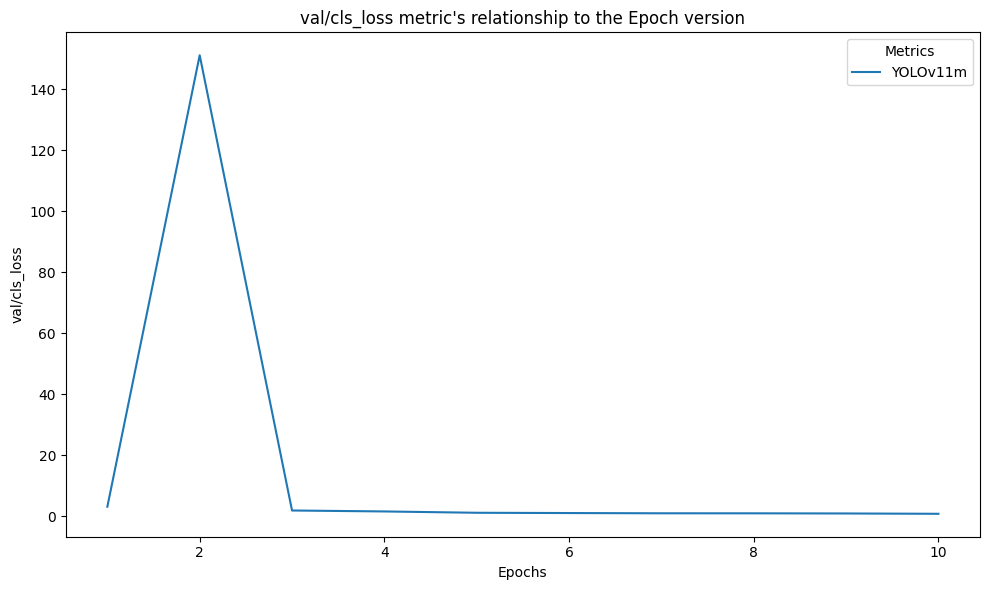

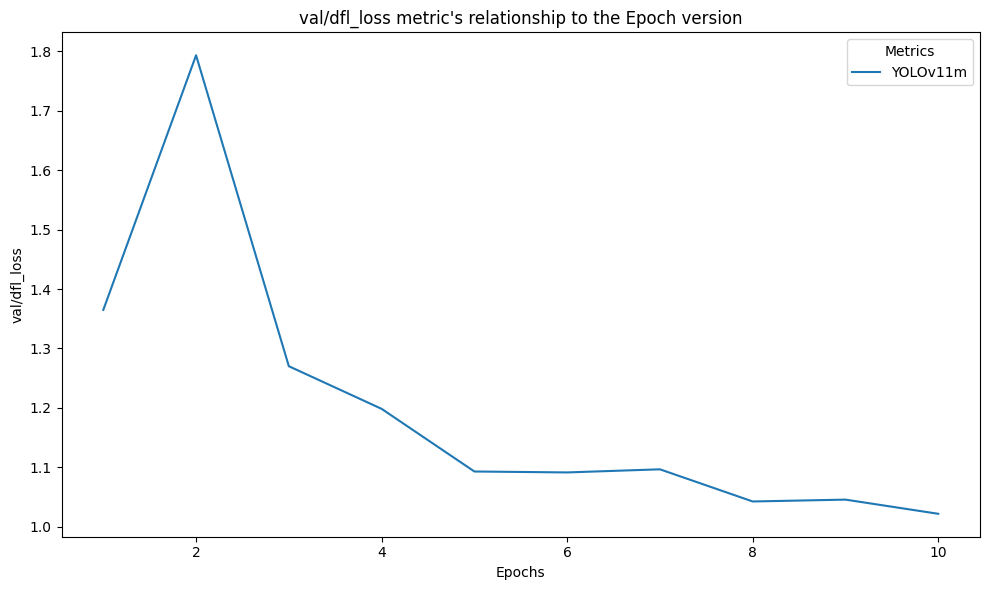

In [7]:
import pandas as pd
import seaborn as sns 

df = pd.read_csv(r"C:\Users\avina\OneDrive\Desktop\AI-powered Medical Diognisis\brain tumer\runs\detect\yolov11_m13\results.csv")

metrics = ['train/box_loss','train/cls_loss','train/dfl_loss','val/box_loss','val/cls_loss','val/dfl_loss']

plt.figure(figsize=(10, 6))

for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='epoch', y=metric, data=df, label="YOLOv11m")
    
    plt.title(f"{metric} metric's relationship to the Epoch version")
    plt.xlabel("Epochs")
    plt.ylabel(f"{metric}")
    plt.legend(title="Metrics")
    plt.tight_layout()
    
    plt.show()



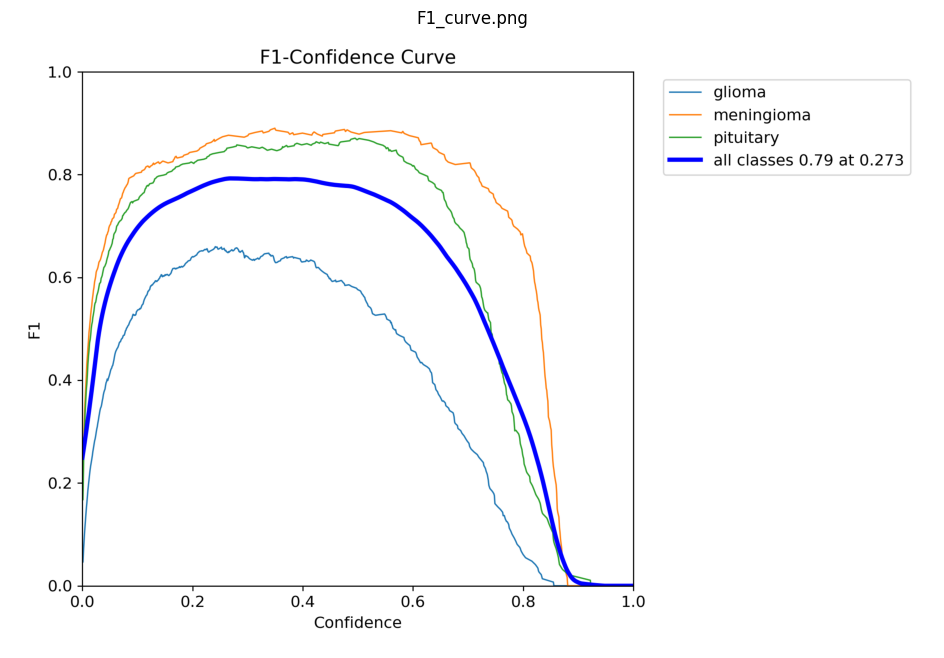

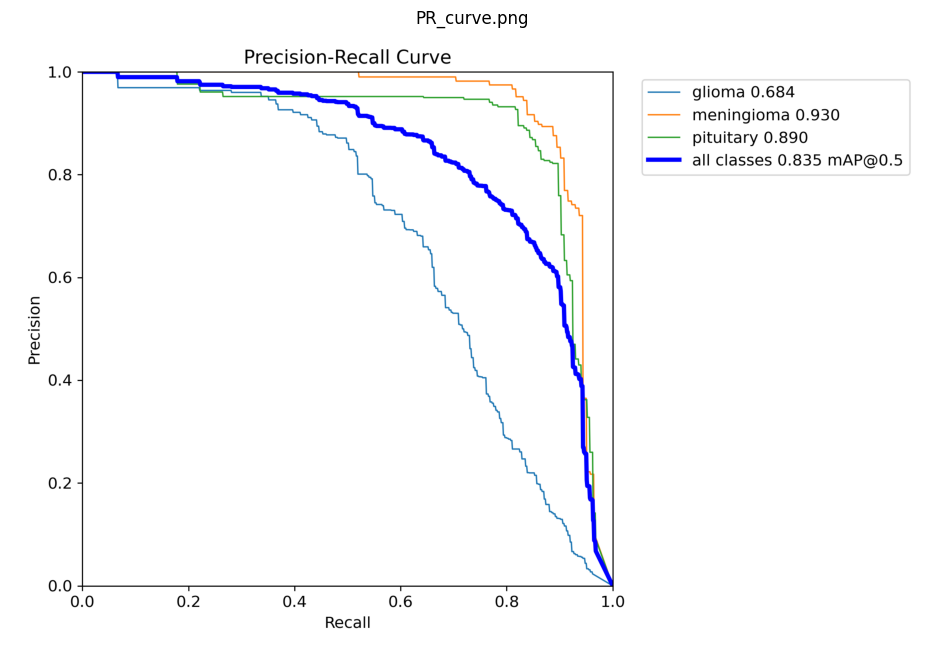

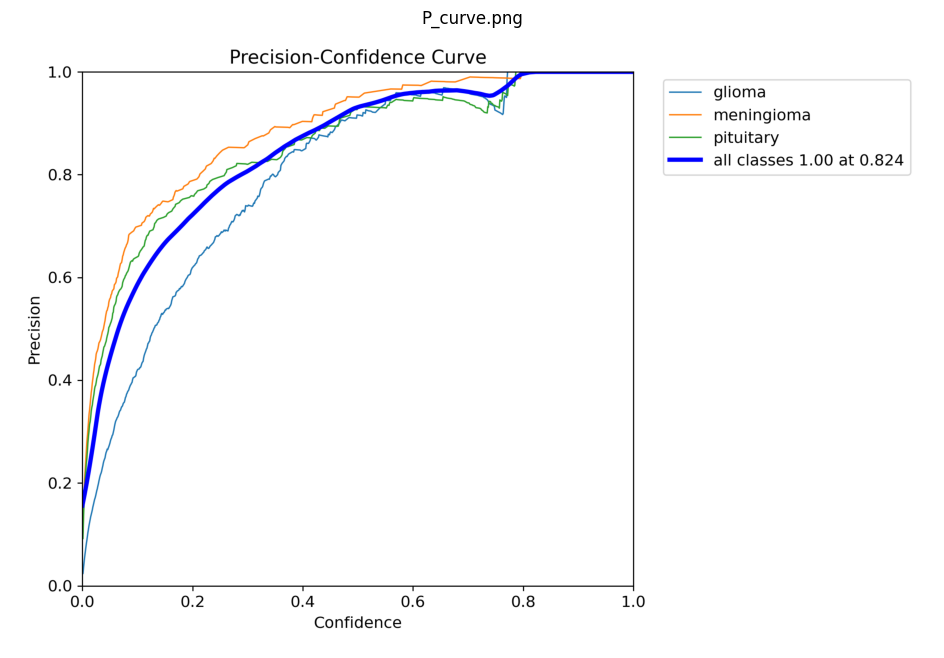

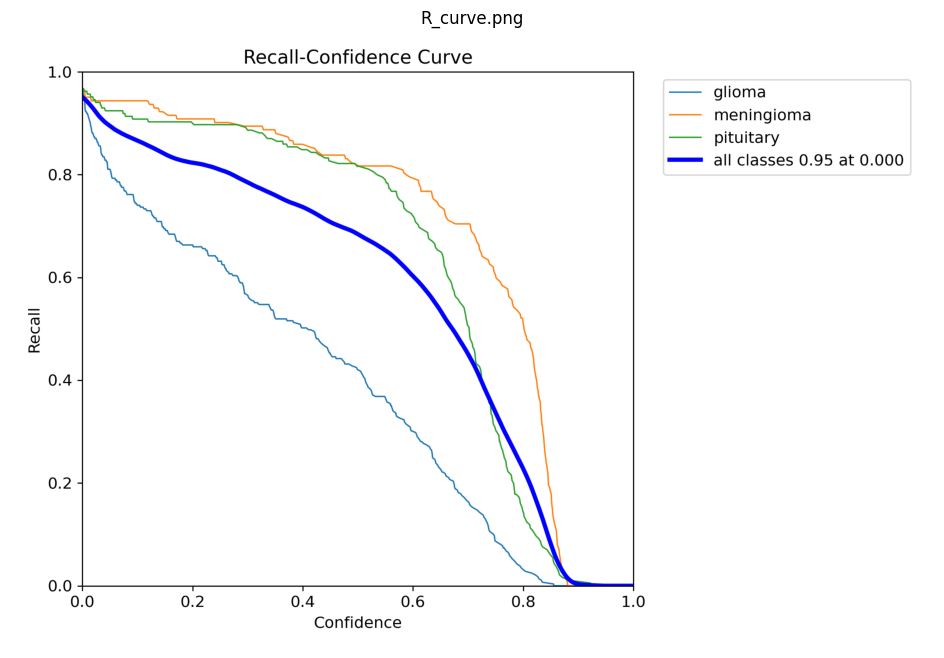

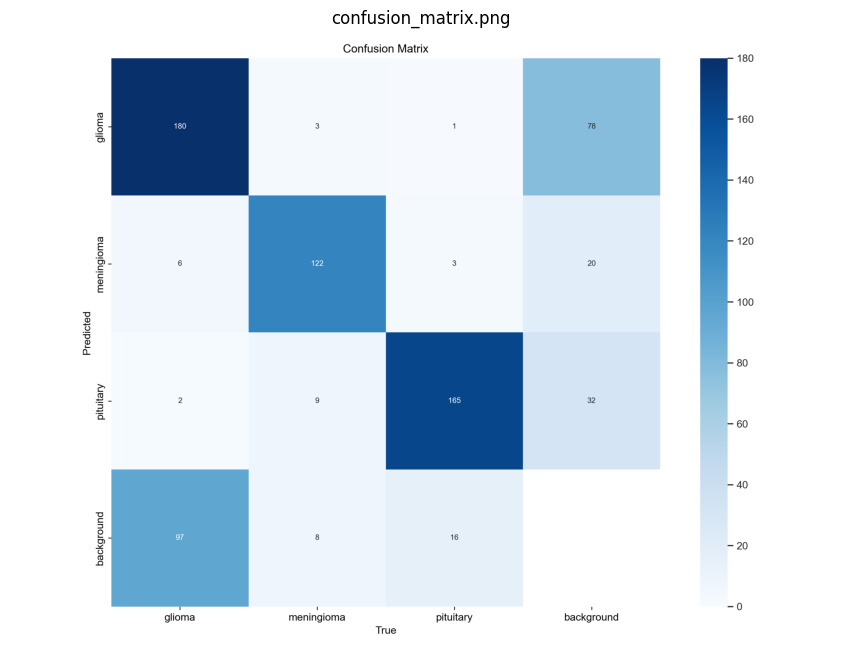

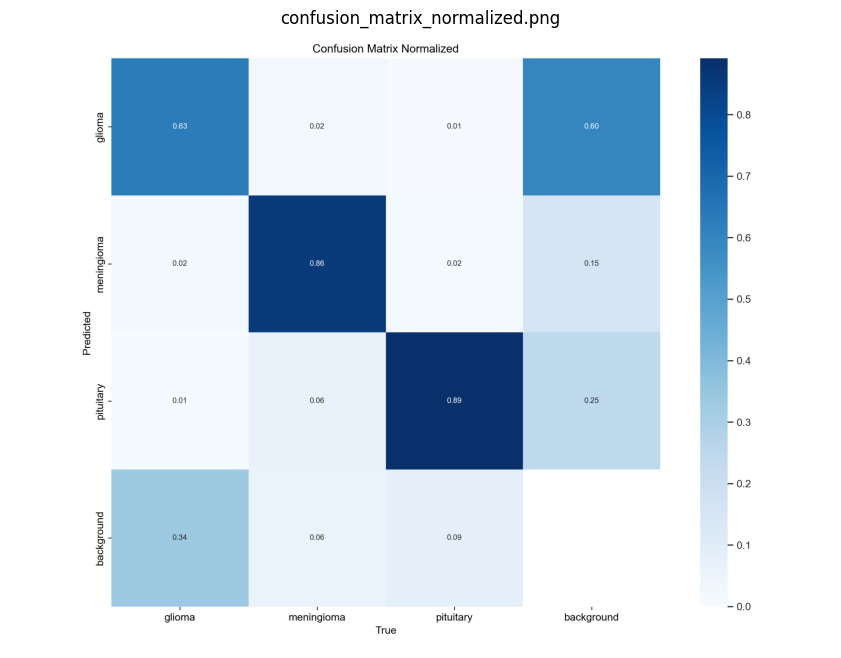

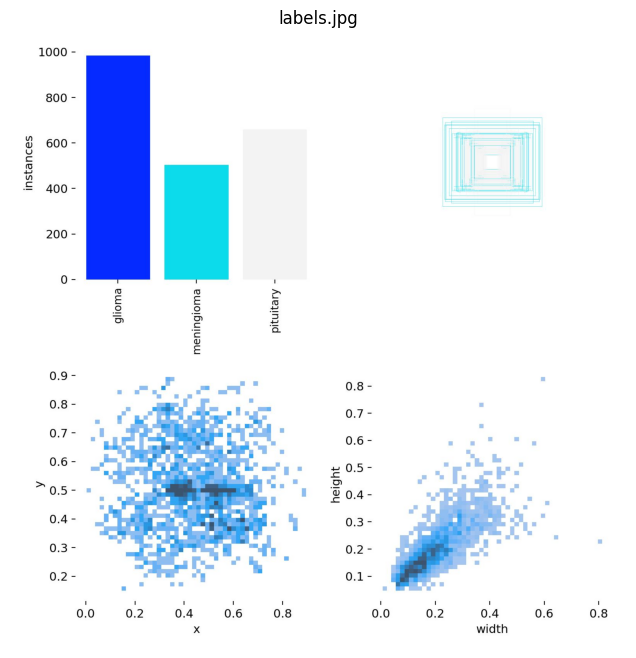

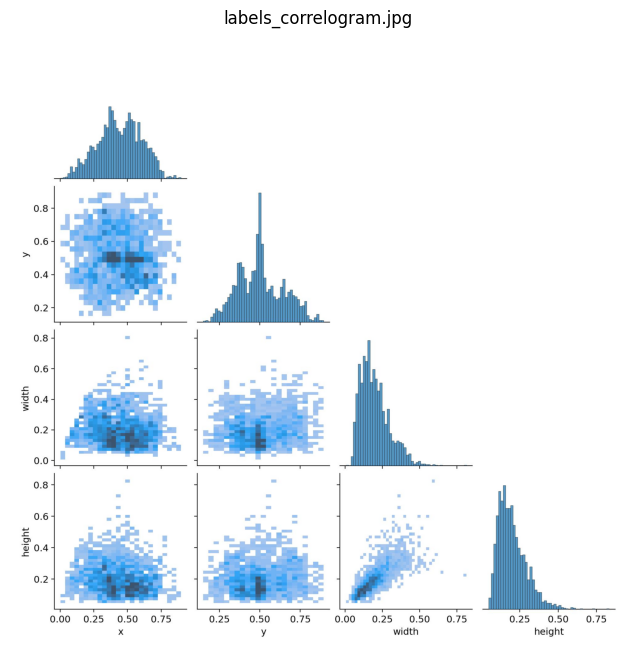

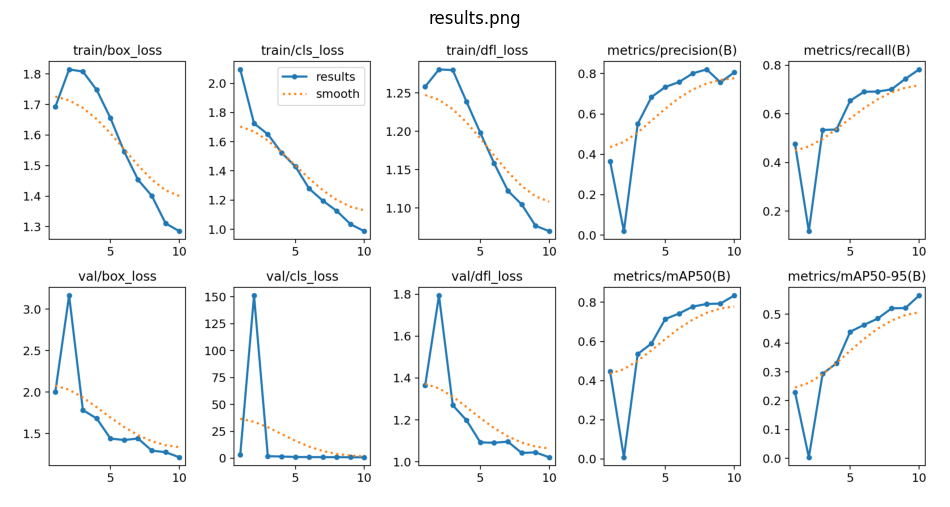

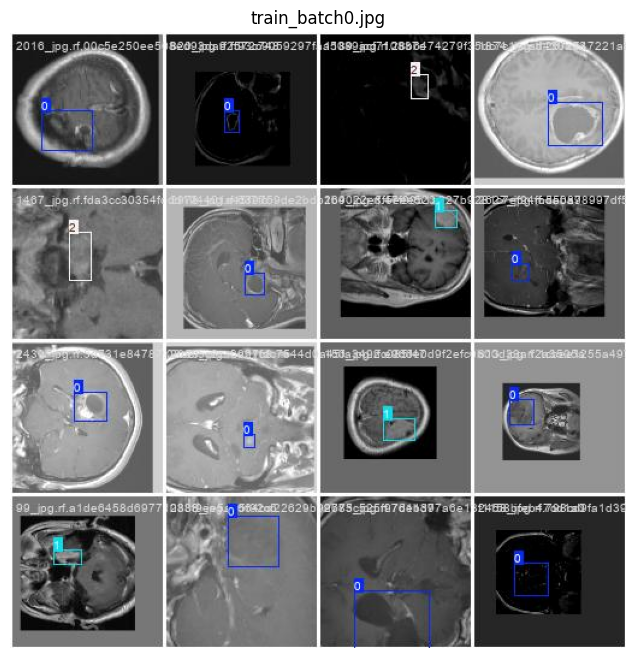

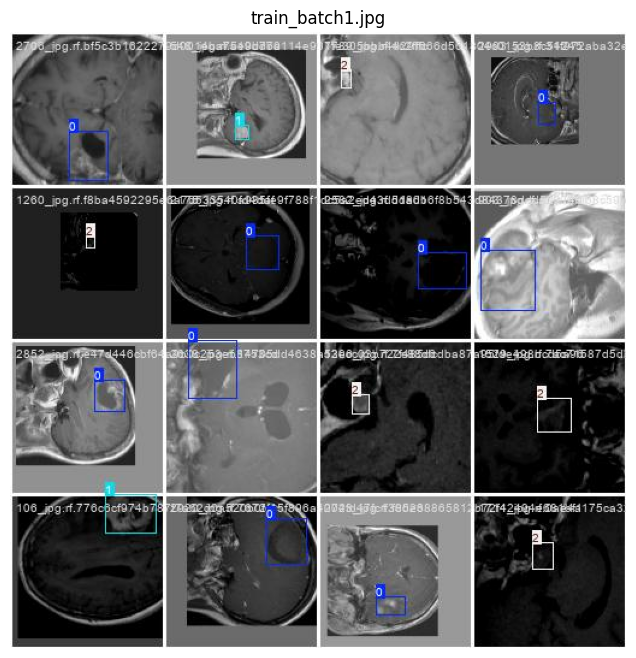

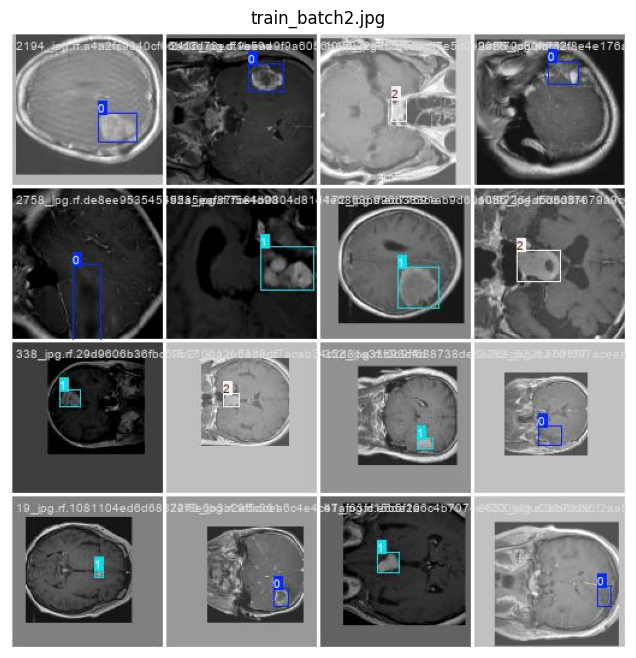

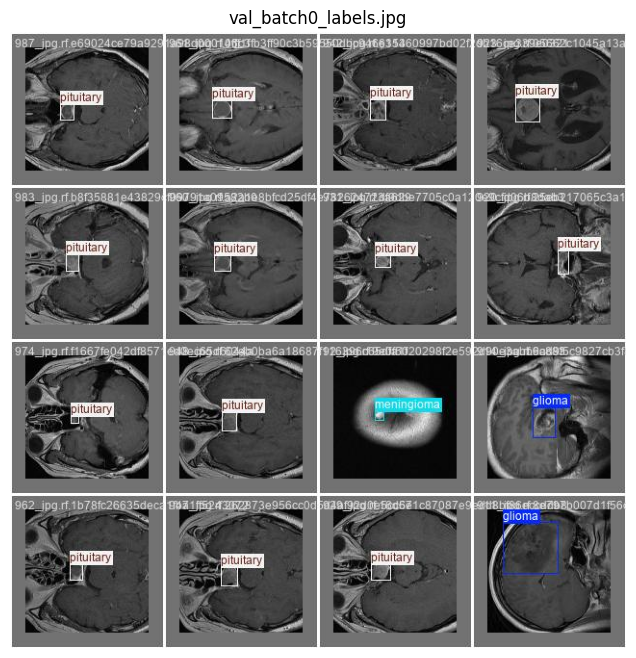

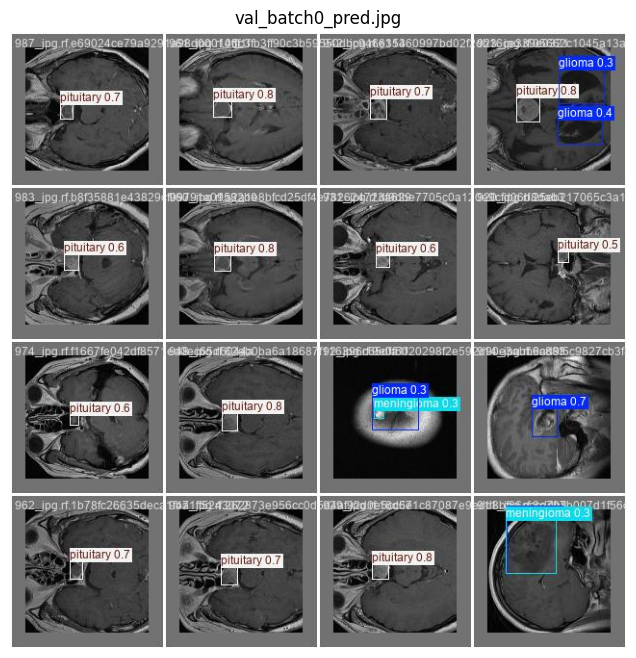

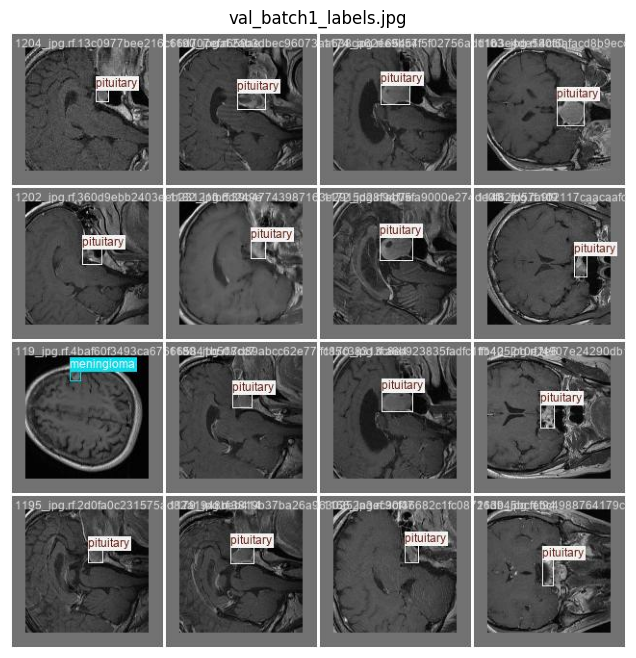

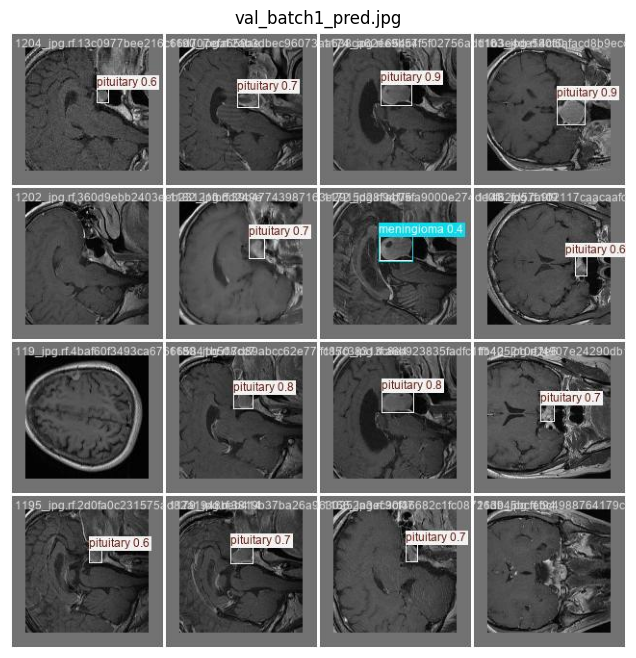

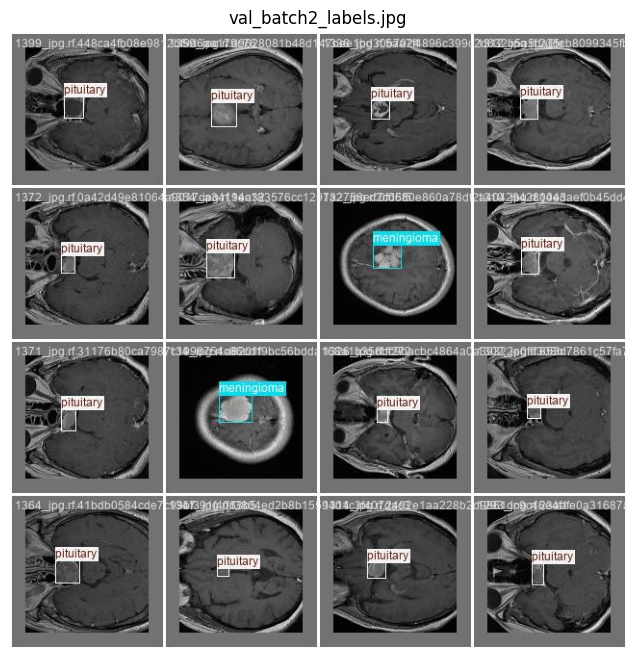

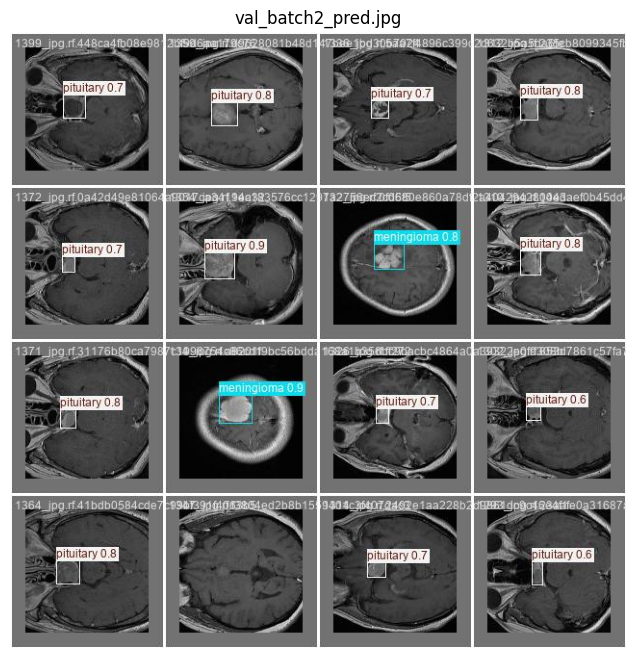

In [8]:
from imutils import paths

log_dir = r"C:\Users\avina\OneDrive\Desktop\AI-powered Medical Diognisis\brain tumer\runs\detect\yolov11_m13"
for image_path in sorted(paths.list_images(log_dir)):
    image = Image.open(image_path)
    plt.figure(figsize=(12, 8))
    plt.imshow(image)
    plt.title(os.path.basename(image_path))
    plt.axis('off')
    plt.show()

In [9]:
from ultralytics import YOLO

model = YOLO(r"C:\Users\avina\OneDrive\Desktop\AI-powered Medical Diognisis\brain tumer\runs\detect\yolov11_m13\weights\best.pt")  # Load trained model
results = model(r"C:\Users\avina\OneDrive\Desktop\1_BGxLxoHd8MG9m8gesYIprw.jpg")  # Run inference on an image
results[0].show()  # Display detection results



image 1/1 C:\Users\avina\OneDrive\Desktop\1_BGxLxoHd8MG9m8gesYIprw.jpg: 128x128 (no detections), 156.6ms
Speed: 6.7ms preprocess, 156.6ms inference, 5.4ms postprocess per image at shape (1, 3, 128, 128)
